<a href="https://colab.research.google.com/github/kashyapshukla/12344/blob/master/AIstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import array
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler    
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('AAPL.csv')

Saving AAPL.csv to AAPL.csv


In [ ]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


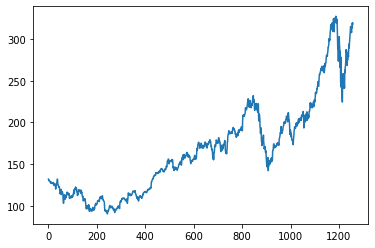

In [ ]:
df1 = df['close']
df['close'].plot()

In [ ]:
df1 = np.array(df1)
df1 = df1.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [ ]:
df1.shape

(1258, 1)

In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data  =df1[0:training_size,:], df1[training_size:len(df1),:1]
train_data.shape

(817, 1)

In [ ]:
test_data.shape

(441, 1)

In [ ]:
training_size, test_size

(817, 441)

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_sept), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
train_data.shape, test_data.shape

((817, 1), (441, 1))

In [ ]:
trainplot = np.arange(1,818)
testplot = np.arange(818,1259)

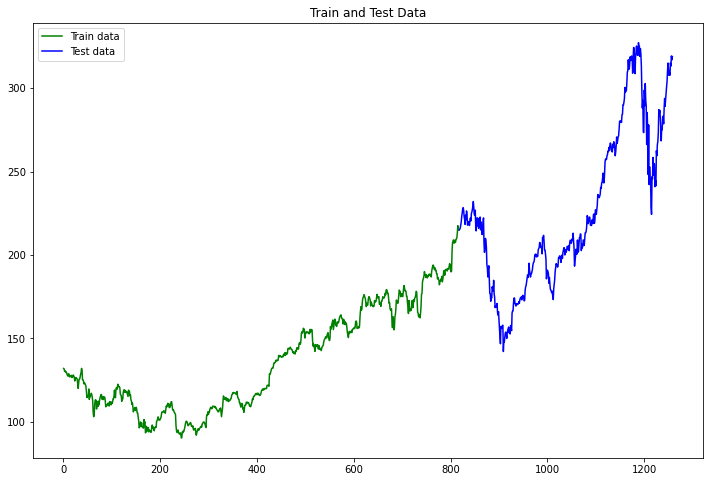

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(trainplot,scaler.inverse_transform(train_data)[:,0], 'green', label='Train data')
plt.plot(testplot, scaler.inverse_transform(test_data)[:,0],'blue', label='Test data')
plt.legend()
plt.title('Train and Test Data')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = model.predict(X_test)
print("Predicted Value",predictions[:10][0])
print("Expected Value",y_test[:10][0])

Predicted Value 0.26591241262096654
Expected Value 0.2727349489149709


In [ ]:
pred_df= pd.DataFrame(predictions)
pred_df['TrueValues']=y_test

new_pred_df=pred_df.rename(columns={0: 'Predictions'})
new_pred_df.head()

,Predictions,TrueValues
0,0.265912,0.272735
1,0.267869,0.276619
2,0.289373,0.280672
3,0.286837,0.265811
4,0.264365,0.268429


Text(0.5, 1.0, 'Predictions Vs True Values on Testing Set')

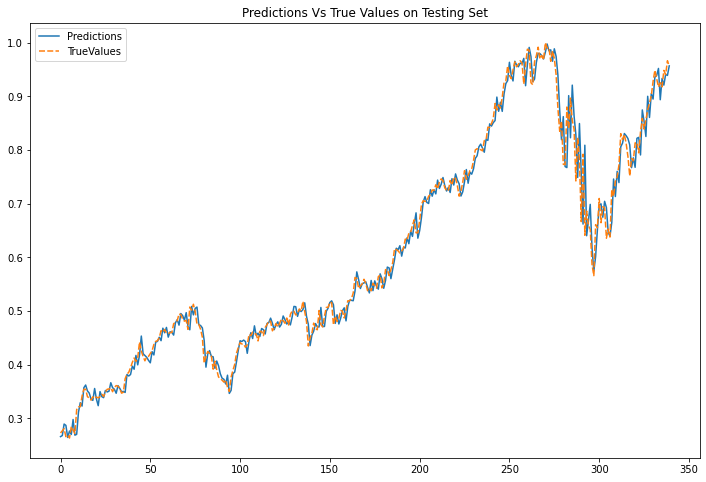

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=new_pred_df)
plt.title("Predictions Vs True Values on Testing Set")

In [ ]:
print("model Accuracy on training data:",model.score(X_train, y_train))


model Accuracy on training data: 0.9970342320018716


In [ ]:
print("model Accuracy is on testing data:",model.score(X_test, y_test))

model Accuracy is on training data: 0.9847722212152704


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

142.1363100026703

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

238.13157949250507